<a href="https://colab.research.google.com/github/Swapnil-byte-798/Diabetes-prediction-System/blob/main/Pneumonia_Detection_using_Chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# ===============================================================
# 1. Import Libraries
# ===============================================================
import os, glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [19]:
# ===============================================================
# 2. Mount Drive and Load Dataset
# ===============================================================
from google.colab import drive
drive.mount('/content/drive')


main_path = "/content/drive/MyDrive/Colab Notebooks/Pneumonia_Dataset/chest_xray"

train_path = os.path.join(main_path, "train")
test_path  = os.path.join(main_path, "test")

train_normal     = glob.glob(train_path + "/NORMAL/*")
train_pneumonia  = glob.glob(train_path + "/PNEUMONIA/*")
test_normal      = glob.glob(test_path  + "/NORMAL/*")
test_pneumonia   = glob.glob(test_path  + "/PNEUMONIA/*")

print("Train NORMAL:", len(train_normal))
print("Train PNEUMONIA:", len(train_pneumonia))
print("Test NORMAL:", len(test_normal))
print("Test PNEUMONIA:", len(test_pneumonia))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train NORMAL: 1341
Train PNEUMONIA: 3875
Test NORMAL: 234
Test PNEUMONIA: 390


In [38]:
IMG_SIZE = 224
BATCH = 64
SEED = 42

In [26]:
import pandas as pd
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [27]:
df_train

class                                              image
0        Normal  /content/drive/MyDrive/Colab Notebooks/Pneumon...
1        Normal  /content/drive/MyDrive/Colab Notebooks/Pneumon...
2        Normal  /content/drive/MyDrive/Colab Notebooks/Pneumon...
3        Normal  /content/drive/MyDrive/Colab Notebooks/Pneumon...
4        Normal  /content/drive/MyDrive/Colab Notebooks/Pneumon...
...         ...                                                ...
5211  Pneumonia  /content/drive/MyDrive/Colab Notebooks/Pneumon...
5212  Pneumonia  /content/drive/MyDrive/Colab Notebooks/Pneumon...
5213  Pneumonia  /content/drive/MyDrive/Colab Notebooks/Pneumon...
5214  Pneumonia  /content/drive/MyDrive/Colab Notebooks/Pneumon...
5215  Pneumonia  /content/drive/MyDrive/Colab Notebooks/Pneumon...

[5216 rows x 2 columns]

In [28]:
df_test

class                                              image
0       Normal  /content/drive/MyDrive/Colab Notebooks/Pneumon...
1       Normal  /content/drive/MyDrive/Colab Notebooks/Pneumon...
2       Normal  /content/drive/MyDrive/Colab Notebooks/Pneumon...
3       Normal  /content/drive/MyDrive/Colab Notebooks/Pneumon...
4       Normal  /content/drive/MyDrive/Colab Notebooks/Pneumon...
..         ...                                                ...
619  Pneumonia  /content/drive/MyDrive/Colab Notebooks/Pneumon...
620  Pneumonia  /content/drive/MyDrive/Colab Notebooks/Pneumon...
621  Pneumonia  /content/drive/MyDrive/Colab Notebooks/Pneumon...
622  Pneumonia  /content/drive/MyDrive/Colab Notebooks/Pneumon...
623  Pneumonia  /content/drive/MyDrive/Colab Notebooks/Pneumon...

[624 rows x 2 columns]

/tmp/ipython-input-3734660035.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df_train, palette="mako")


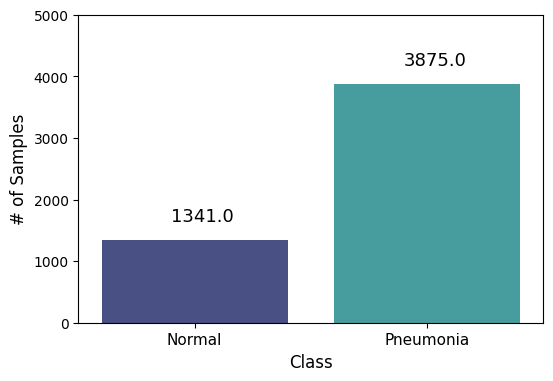

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

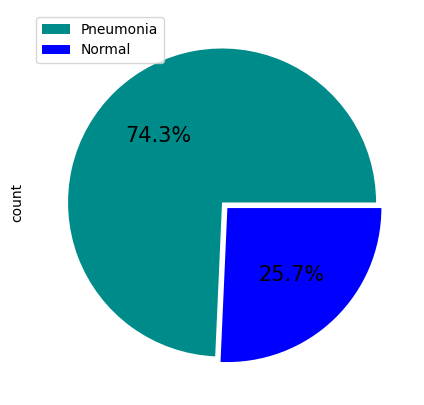

In [32]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

/tmp/ipython-input-482614858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df_test, palette="mako")


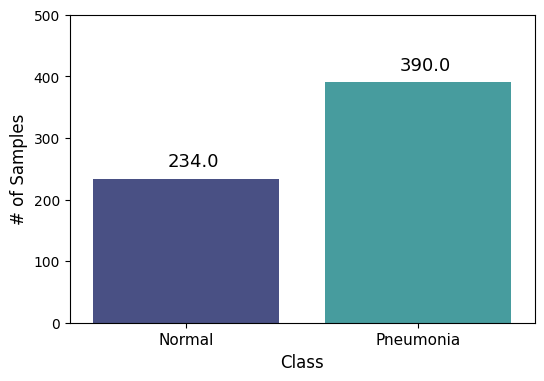

In [33]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

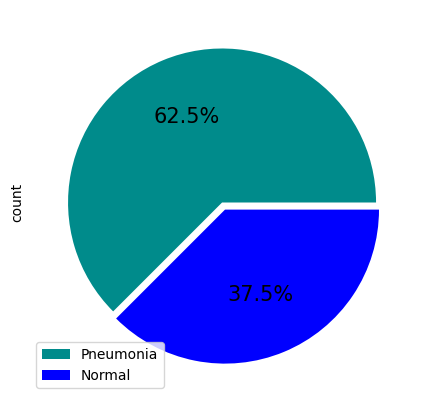

In [34]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

Train Set - Normal


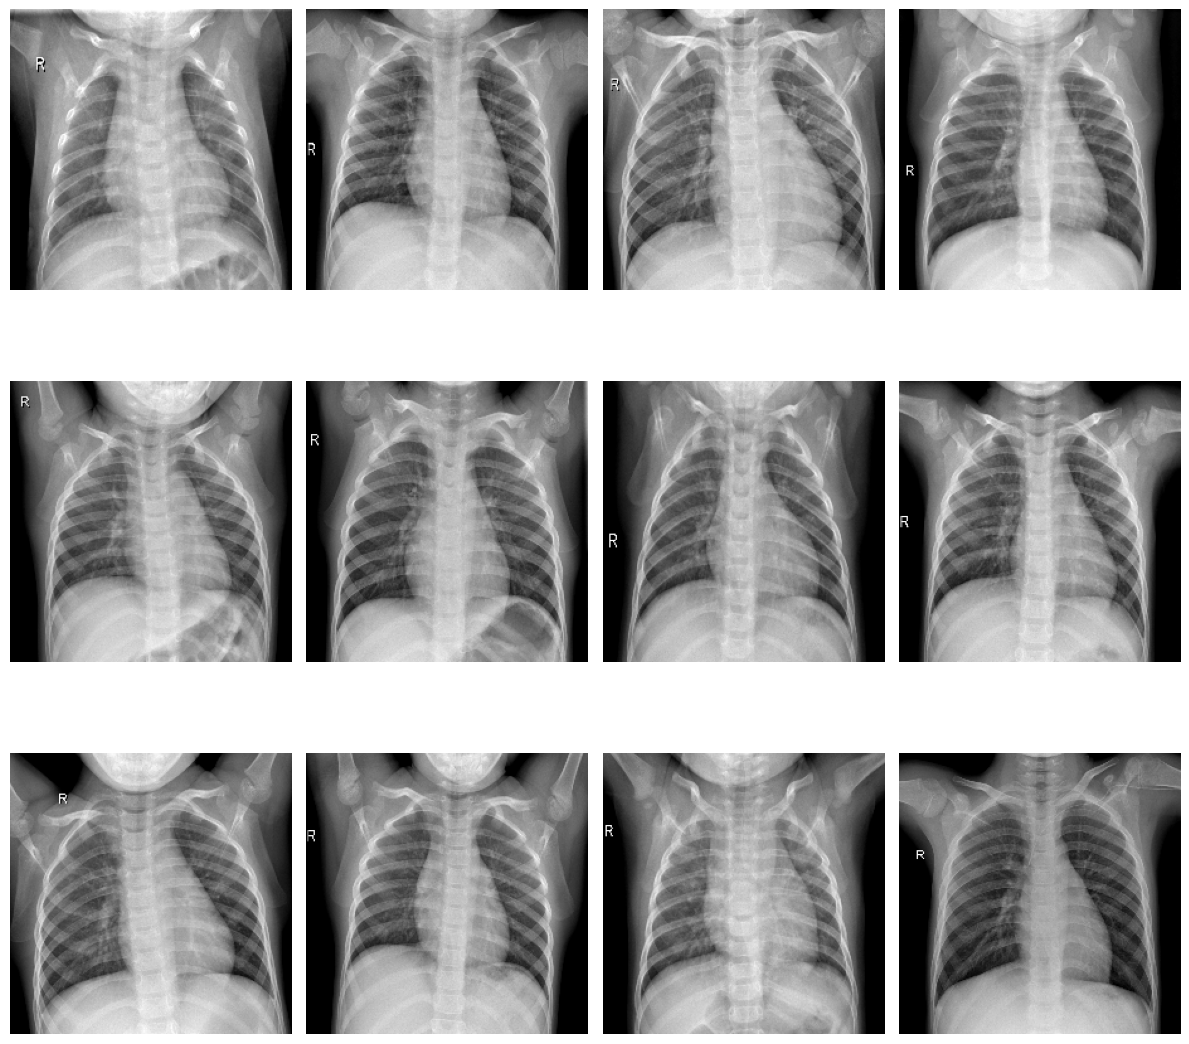

In [39]:
import cv2
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


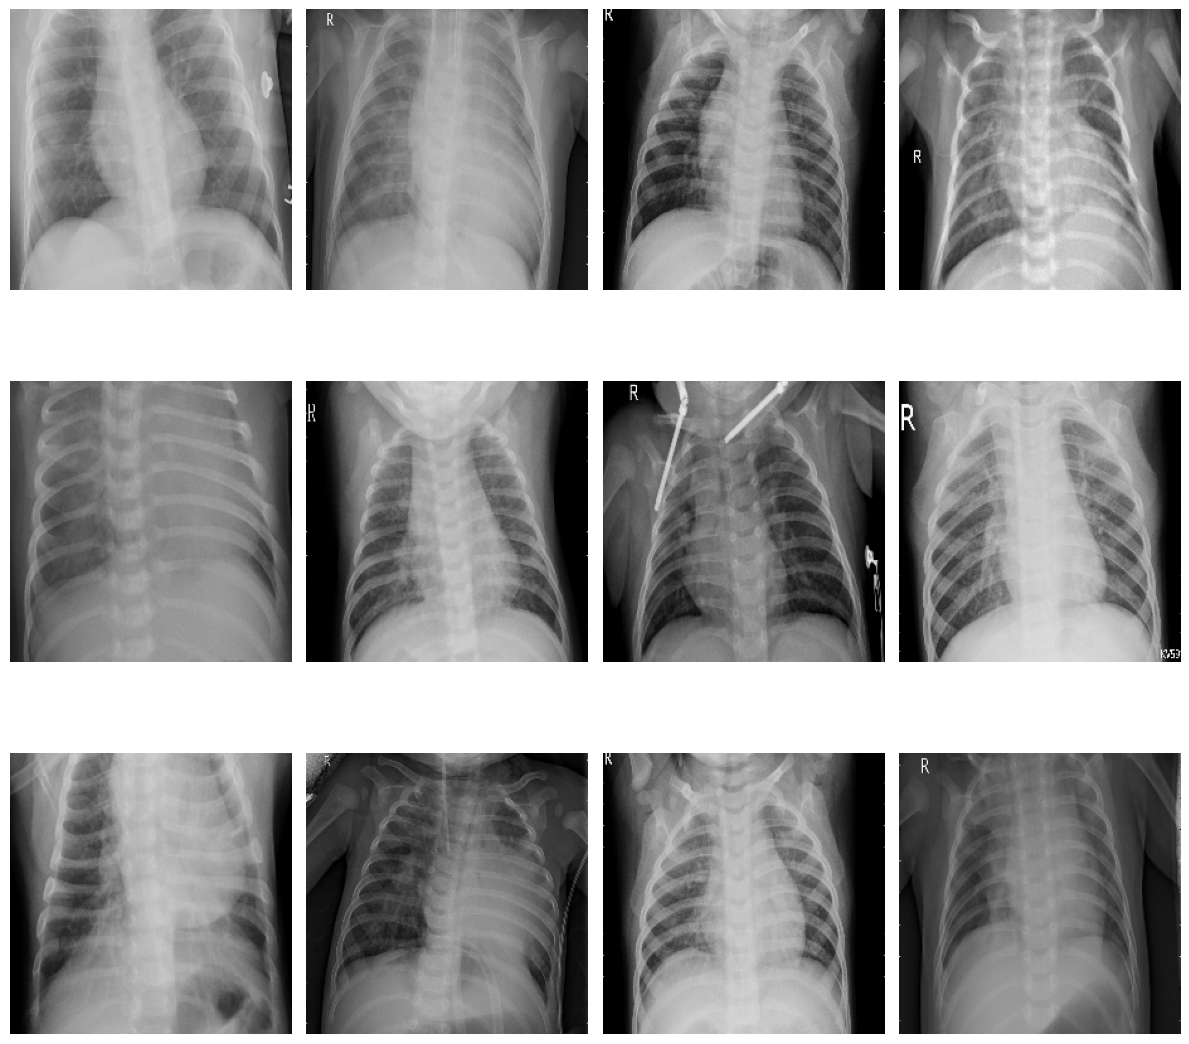

In [40]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


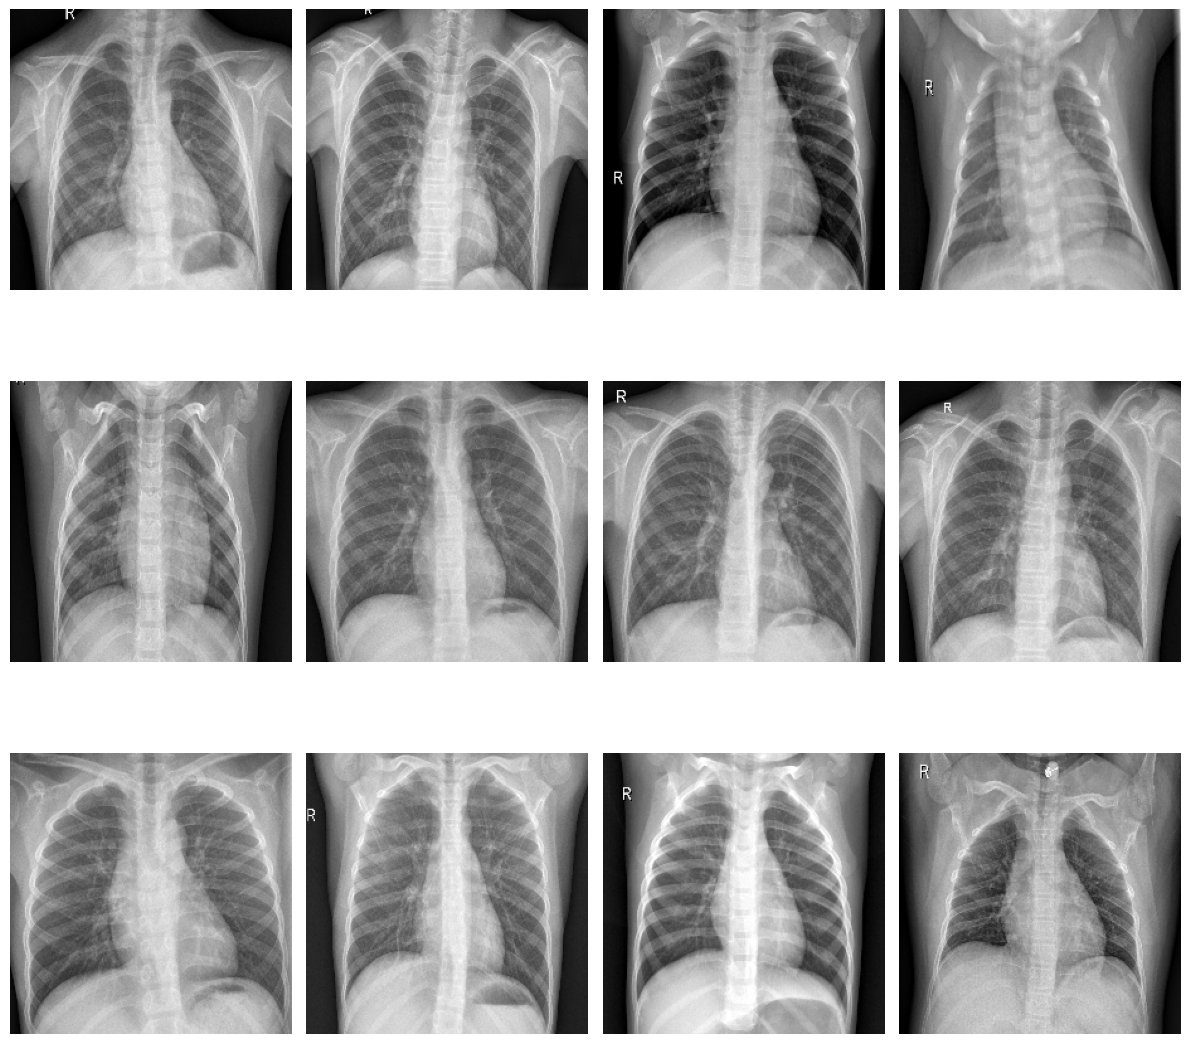

In [41]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Pneumonia


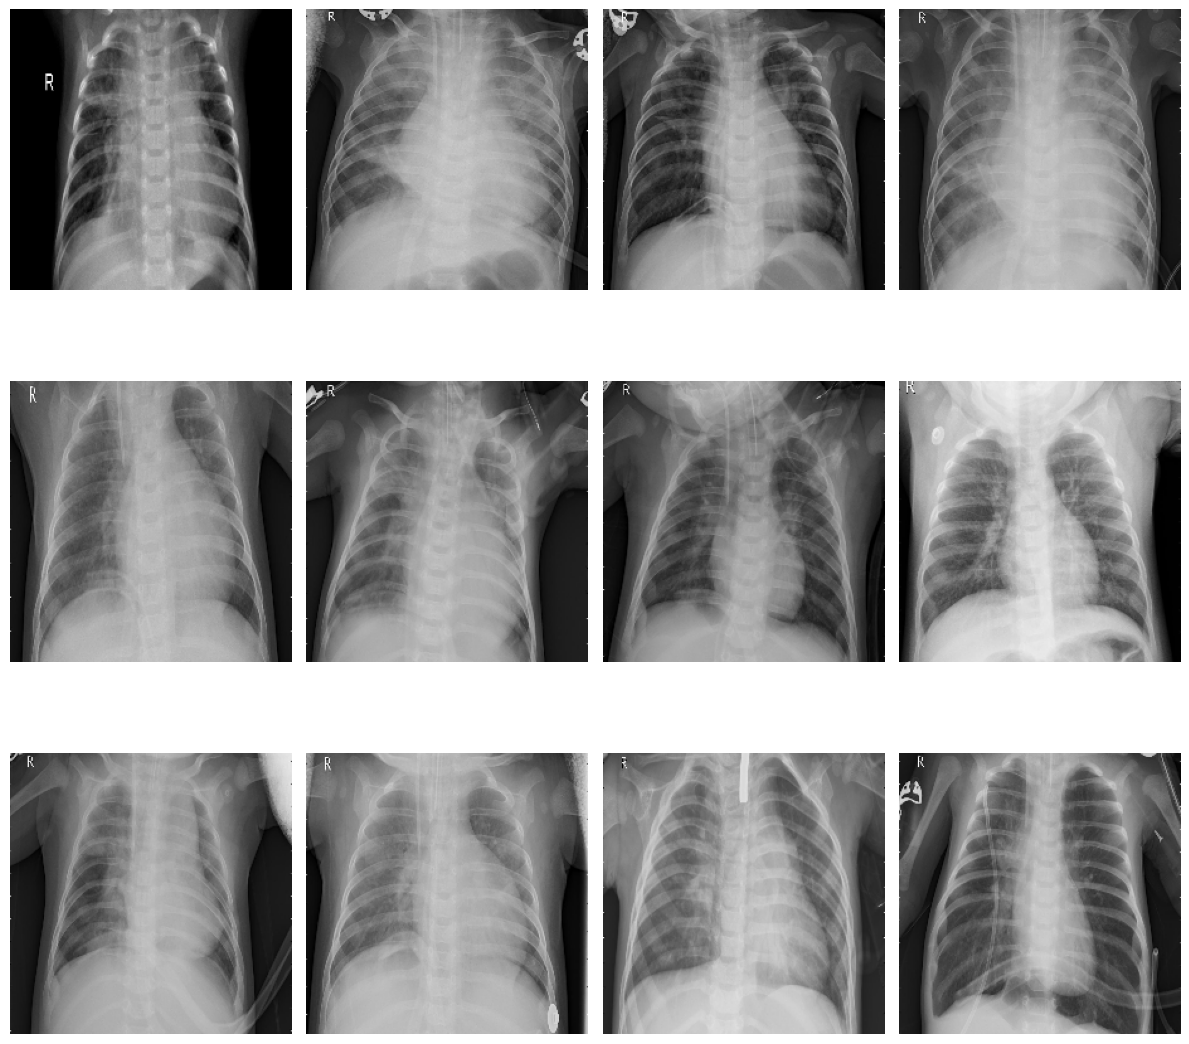

In [42]:
print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [20]:
# ===============================================================
# 3. Data Generators
# ===============================================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ===============================================================
# 4. CNN Model (High-Performance Architecture)
# ===============================================================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# ===============================================================
# 5. Callbacks
# ===============================================================
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)





Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,265,729 (73.49 MB)

 Trainable params: 19,264,769 (73.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [21]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0,1]),
    y=train_gen.classes
)

class_weights = {0: class_weights[0], 1: class_weights[1]}
print(class_weights)


{0: np.float64(1.9445479962721341), 1: np.float64(0.6730645161290323)}


In [23]:
# ===============================================================
# 6. Train Model
# ===============================================================
history = model.fit(
    train_gen,
    epochs=40,
    validation_data=val_gen,
    callbacks=[early_stop, lr_reduce],
    class_weight=class_weights
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 2882s 22s/step - accuracy: 0.6098 - loss: 1.6608 - val_accuracy: 0.7430 - val_loss: 4.5104 - learning_rate: 1.0000e-04
Epoch 2/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 126s 966ms/step - accuracy: 0.7649 - loss: 0.5051 - val_accuracy: 0.7430 - val_loss: 9.1574 - learning_rate: 1.0000e-04
Epoch 3/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 127s 971ms/step - accuracy: 0.8140 - loss: 0.4120 - val_accuracy: 0.7430 - val_loss: 10.5926 - learning_rate: 1.0000e-04
Epoch 4/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 129s 987ms/step - accuracy: 0.8391 - loss: 0.3833 - val_accuracy: 0.7430 - val_loss: 11.7791 - learning_rate: 1.0000e-04
Epoch 5/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 129s 987ms/step - accuracy: 0.8670 - loss: 0.3289 - val_accuracy: 0.7430 - val_loss: 7.9042 - learning_rate: 3.0000e-05
Epoch 6/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 130s 989ms/step - accuracy: 0.8644 - loss: 0.3129 - val_accuracy: 0.7430 - val_loss: 5.9334 - learning_rate: 3.0000e-05
Epoch 7/40
131/131 ━━━━━━━━━━━━━━━━━━━━

In [24]:
# ===============================================================
# 7. Evaluate on Test Data
# ===============================================================
score = model.evaluate(test_gen)
print(f"\nTest Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]*100:.2f}%")



20/20 ━━━━━━━━━━━━━━━━━━━━ 486s 26s/step - accuracy: 0.7318 - loss: 1.8797

Test Loss: 1.0964
Test Accuracy: 83.17%


In [45]:
score = model.evaluate(val_gen)
print(f"\Val Loss: {score[0]:.4f}")
print(f"Val Accuracy: {score[1]*100:.2f}%")


<>:2: SyntaxWarning: invalid escape sequence '\V'
<>:2: SyntaxWarning: invalid escape sequence '\V'
/tmp/ipython-input-2891445547.py:2: SyntaxWarning: invalid escape sequence '\V'
  print(f"\Val Loss: {score[0]:.4f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 769ms/step - accuracy: 0.7820 - loss: 2.5781
\Val Loss: 2.7225
Val Accuracy: 76.13%


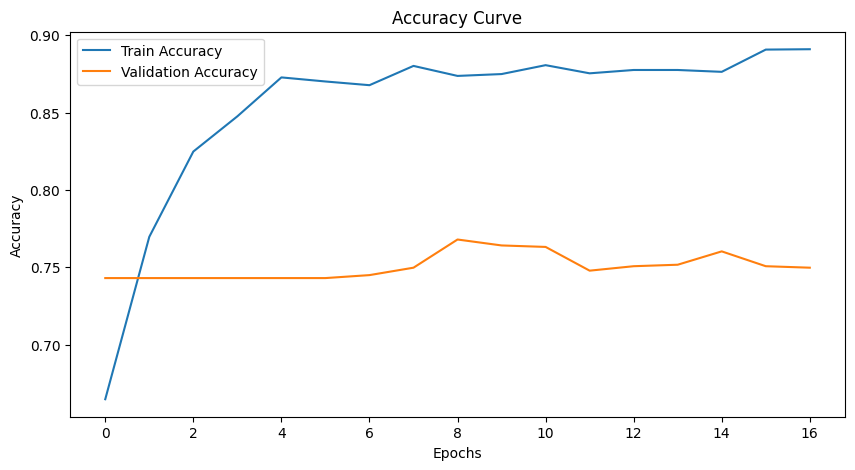

In [44]:
# PLOT RESULTS
# ===============================================================
plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(history.history['accuracy'])),
             y=history.history['accuracy'], label='Train Accuracy')
sns.lineplot(x=range(len(history.history['val_accuracy'])),
             y=history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():

    inputs = keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model(inputs)

    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dropout(0.1)(x)

    output = keras.layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs, output)
    return model

In [58]:
model = get_pretrained()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [59]:
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    callbacks=[early_stop, lr_reduce],
    class_weight=class_weights
)

Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.7319 - loss: 0.5302 - val_accuracy: 0.8993 - val_loss: 0.2473 - learning_rate: 1.0000e-04
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.8867 - loss: 0.2740 - val_accuracy: 0.9051 - val_loss: 0.2393 - learning_rate: 1.0000e-04
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9072 - loss: 0.2264 - val_accuracy: 0.9195 - val_loss: 0.2078 - learning_rate: 1.0000e-04
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9118 - loss: 0.2059 - val_accuracy: 0.8974 - val_loss: 0.2309 - learning_rate: 1.0000e-04
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9203 - loss: 0.1968 - val_accuracy: 0.9243 - val_loss: 0.1898 - learning_rate: 1.0000e-04
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.9327 - loss: 0.1733 - val_accuracy: 0.9271 - val_loss: 0.1872 - learning_rate: 1.0000e-04
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - acc

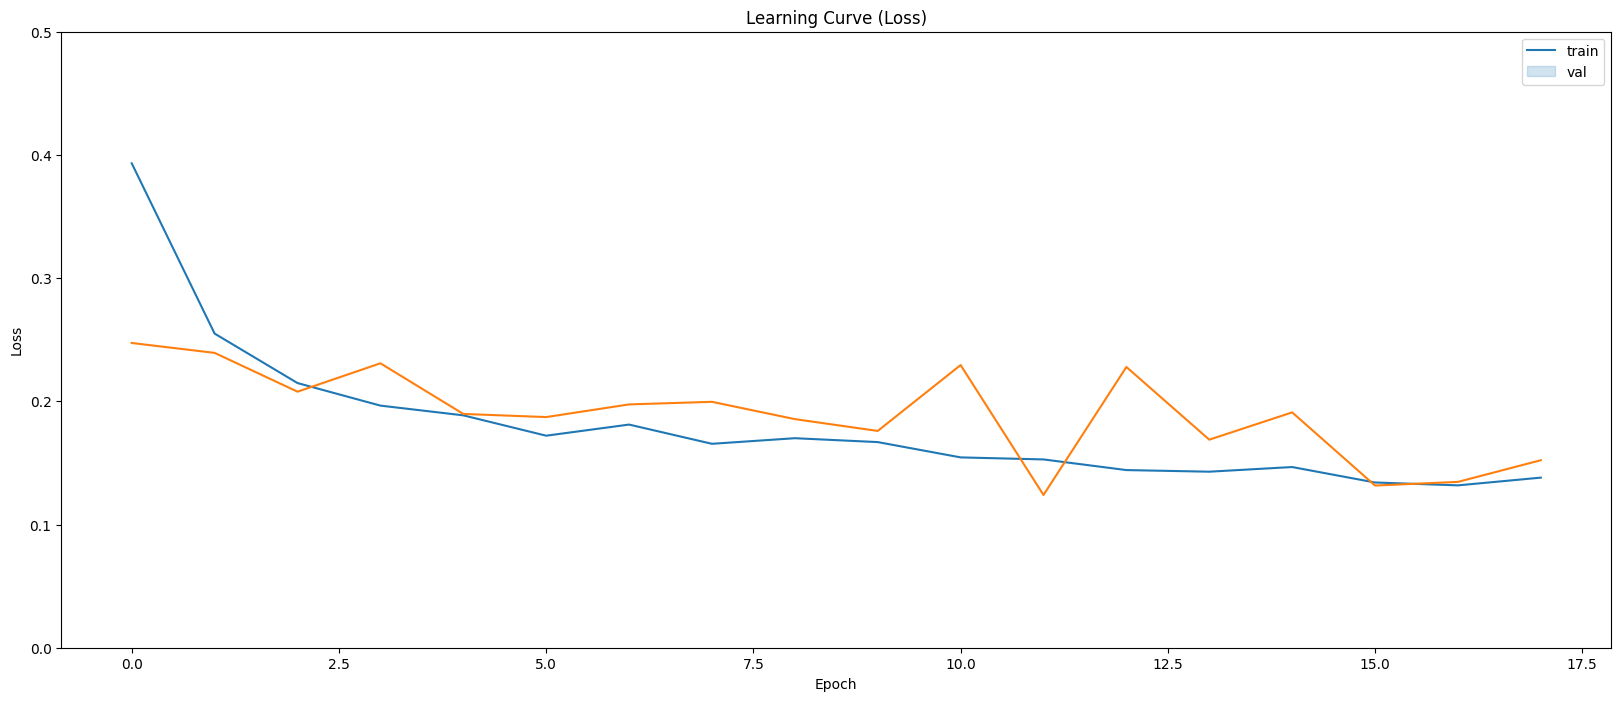

In [60]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

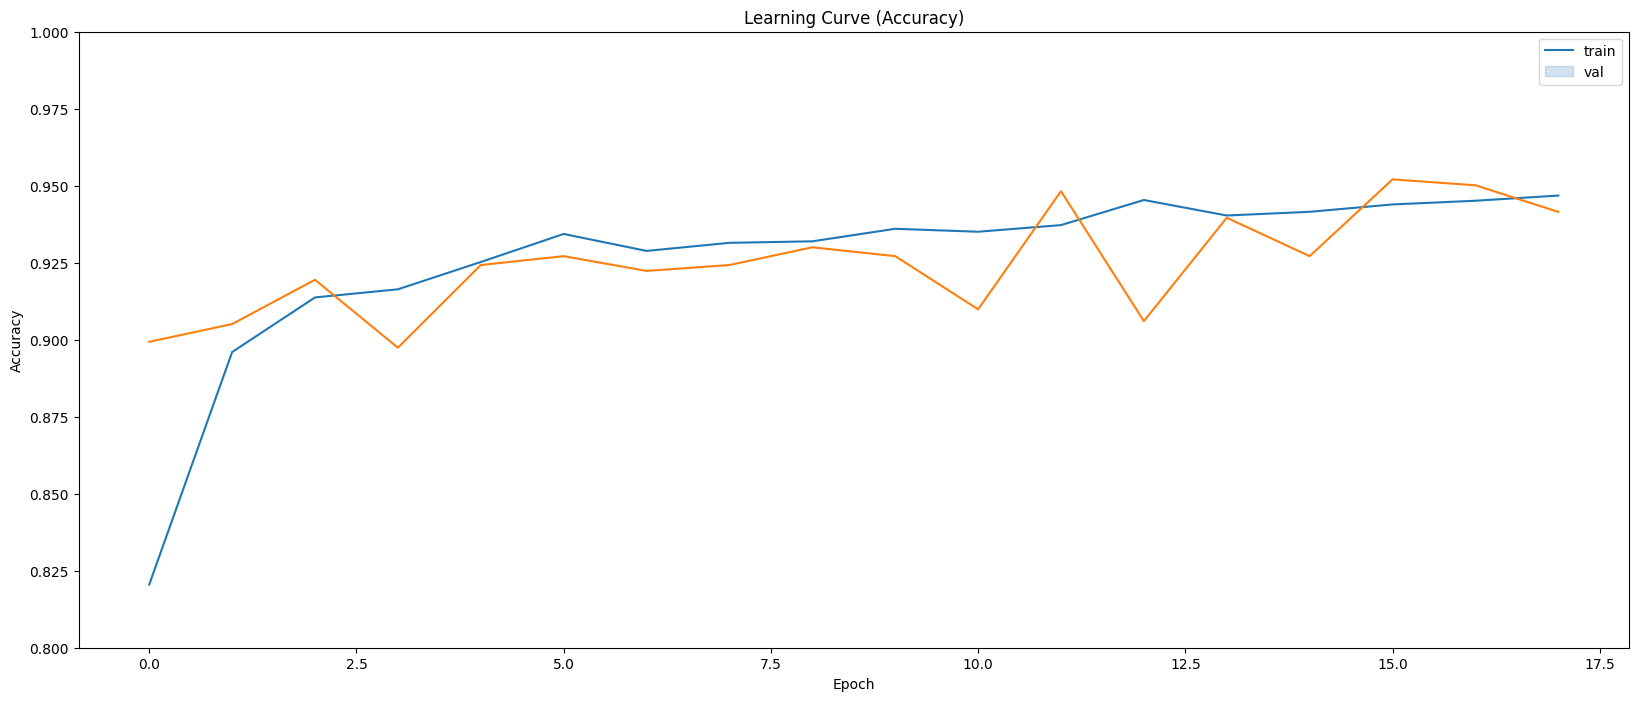

In [66]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [62]:
score = model.evaluate(val_gen, verbose=1)
print('Val loss:', score[0])
print('Val accuracy:', score[1])


33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 804ms/step - accuracy: 0.9390 - loss: 0.1344
Val loss: 0.12993037700653076
Val accuracy: 0.9443911910057068


In [63]:
score = model.evaluate(test_gen, verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 693ms/step - accuracy: 0.8850 - loss: 0.3552
Test loss: 0.2760954201221466
Test accuracy: 0.9070512652397156


In [67]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [68]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_layer_7 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv

In [74]:
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=2e-6),
    metrics=['binary_accuracy']
)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet152v2 (Functional)        │ (None, 7, 7, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,594,049 (223.52 MB)

 Trainable params: 4,731,137 (18.05 MB)

 Non-trainable params: 53,862,912 (205.47 MB)

In [76]:
history = model.fit(
    train_gen,
    batch_size=BATCH,
    epochs=50,
    validation_data=val_gen,
    callbacks=[early_stop, lr_reduce],
    steps_per_epoch=int(len(train_gen)/BATCH),
    validation_steps=int(len(val_gen)/BATCH),
    class_weight=class_weights

)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 64s 43s/step - binary_accuracy: 0.9062 - loss: 0.5564 - val_binary_accuracy: 0.9540 - val_loss: 0.1177 - learning_rate: 2.0000e-06
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step - binary_accuracy: 0.8958 - loss: 0.2801 - val_binary_accuracy: 0.9501 - val_loss: 0.1283 - learning_rate: 2.0000e-06
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step - binary_accuracy: 0.9271 - loss: 0.2388 - val_binary_accuracy: 0.9501 - val_loss: 0.1318 - learning_rate: 2.0000e-06
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 28s/step - binary_accuracy: 0.8958 - loss: 0.3185 - val_binary_accuracy: 0.9473 - val_loss: 0.1446 - learning_rate: 2.0000e-06
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step - binary_accuracy: 0.8854 - loss: 0.2569 - val_binary_accuracy: 0.9453 - val_loss: 0.1348 - learning_rate: 1.0000e-06
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step - binary_accuracy: 0.9792 - loss: 0.2135 - val_binary_accuracy: 0.9501 - val_loss: 0.1376 - learning_rate: 1.0000e-0

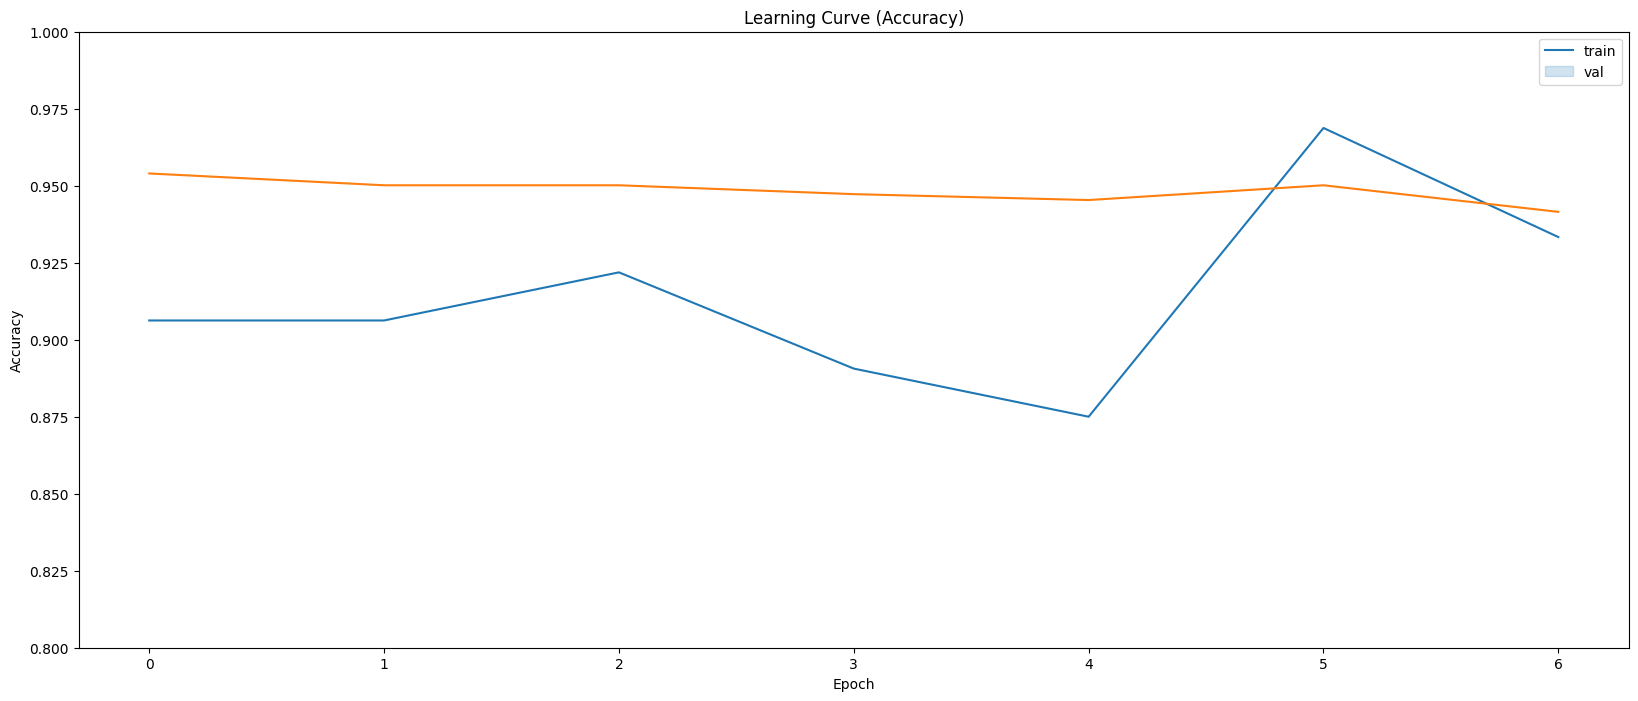

In [79]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

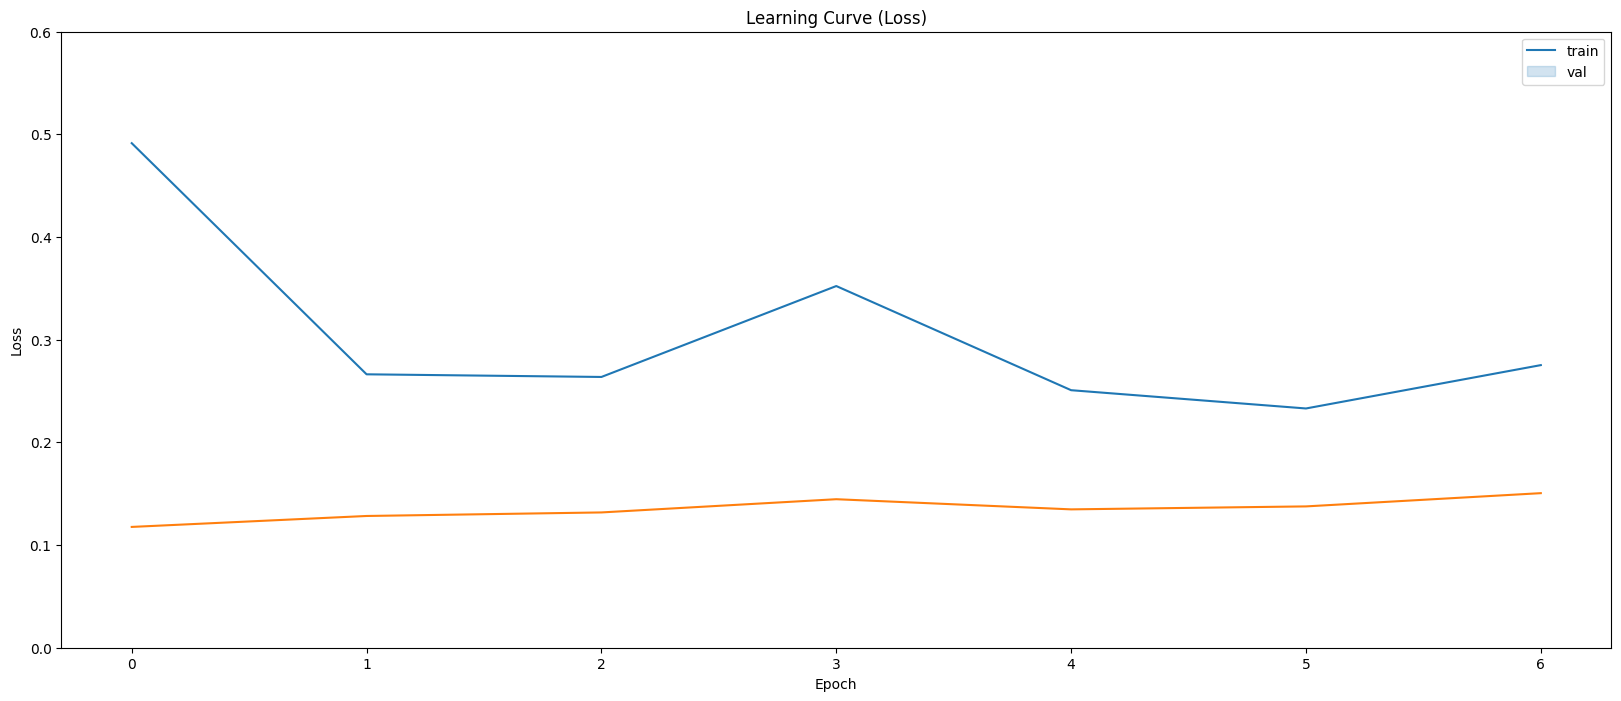

In [83]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.6)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [87]:
score = model.evaluate(val_gen, verbose = 1)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 824ms/step - binary_accuracy: 0.9352 - loss: 0.1604
Val loss: 0.13931842148303986
Val accuracy: 0.9443911910057068


In [89]:
score = model.evaluate(test_gen, verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 875ms/step - binary_accuracy: 0.8837 - loss: 0.3504
Test loss: 0.27323514223098755
Test accuracy: 0.9070512652397156


CUSTOM CNN USING ATTENTION CHANNEL


In [90]:
from tensorflow.keras.layers import *
import tensorflow as tf

def se_block(inputs, ratio=8):
    filters = inputs.shape[-1]
    se = GlobalAveragePooling2D()(inputs)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1,1,filters))(se)
    return Multiply()([inputs, se])


In [91]:
def residual_block(x, filters):
    shortcut = x
    x = SeparableConv2D(filters, 3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(filters, 3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    # Match shortcut
    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, padding='same')(shortcut)

    x = Add()([x, shortcut])
    x = se_block(x)
    return x


In [92]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

inputs = Input(shape=(224,224,3))

x = Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)

# Block 1
x = residual_block(x, 32)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.15)(x)

# Block 2
x = residual_block(x, 64)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.20)(x)

# Block 3
x = residual_block(x, 128)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

# Block 4
x = residual_block(x, 256)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.30)(x)

# Head
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)


In [93]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 224, 224,  │        896 │ input_layer_9[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d    │ (None, 224, 224,  │      1,344 │ batch_normalizat… │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ separable_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_1  │ (None, 224, 224,  │      1,344 │ batch_normalizat… │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ separable_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ add[0][0]         │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 4)         │        132 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 32)        │        160 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1, 32)  │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 224, 224,  │          0 │ add[0][0],        │
│                     │ 32)               │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_21    │ (None, 112, 112,  │          0 │ multiply[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 112, 112,  │          0 │ max_pooling2d_21… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_2  │ (None, 112, 112,  │      2,400 │ dropout_18[0][0]  │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ separable_conv2d… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_3  │ (None, 112, 112,  │      4,736 │ batch_normalizat

 Total params: 275,325 (1.05 MB)

 Trainable params: 273,341 (1.04 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [94]:
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    callbacks=[early_stop, lr_reduce],
    class_weight=class_weights
)


Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.6709 - loss: 0.5729 - val_accuracy: 0.2570 - val_loss: 0.6994 - learning_rate: 1.0000e-04
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8534 - loss: 0.3318 - val_accuracy: 0.2570 - val_loss: 0.7056 - learning_rate: 1.0000e-04
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.8617 - loss: 0.3059 - val_accuracy: 0.7430 - val_loss: 0.6446 - learning_rate: 1.0000e-04
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.8573 - loss: 0.3162 - val_accuracy: 0.7430 - val_loss: 0.5751 - learning_rate: 1.0000e-04
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.8748 - loss: 0.2823 - val_accuracy: 0.7430 - val_loss: 0.5814 - learning_rate: 1.0000e-04
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.8653 - loss: 0.3007 - val_accuracy: 0.8495 - val_loss: 0.3042 - learning_rate: 1.0000e-04
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - acc

In [95]:
score = model.evaluate(val_gen, verbose = 1)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 767ms/step - accuracy: 0.9049 - loss: 0.2159
Val loss: 0.21051402390003204
Val accuracy: 0.9041227102279663


In [97]:
score = model.evaluate(test_gen, verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/step - accuracy: 0.7525 - loss: 0.7048
Test loss: 0.4928823709487915
Test accuracy: 0.8125


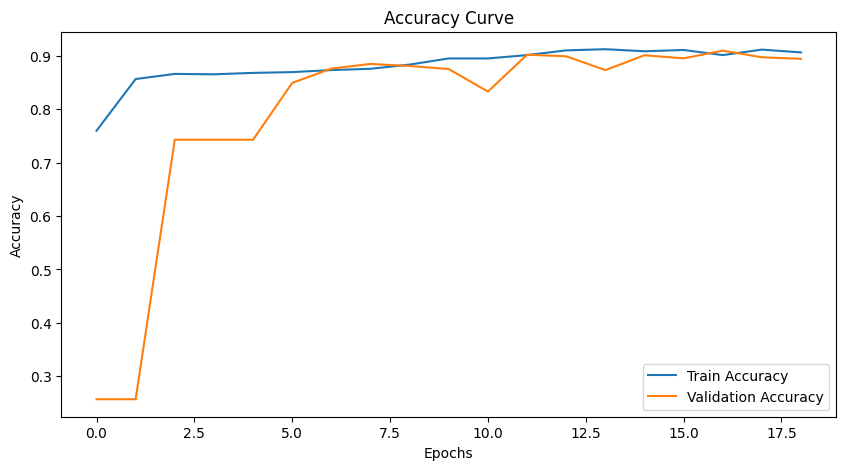

In [98]:
# PLOT RESULTS
# ===============================================================
plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(history.history['accuracy'])),
             y=history.history['accuracy'], label='Train Accuracy')
sns.lineplot(x=range(len(history.history['val_accuracy'])),
             y=history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

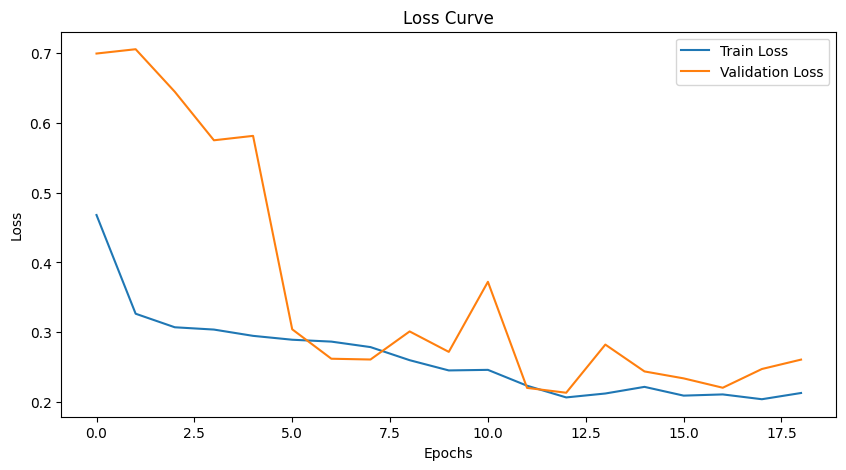

In [102]:
# PLOT RESULTS
# ===============================================================
plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(history.history['loss'])),
             y=history.history['loss'], label='Train Loss')
sns.lineplot(x=range(len(history.history['val_loss'])),
             y=history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()